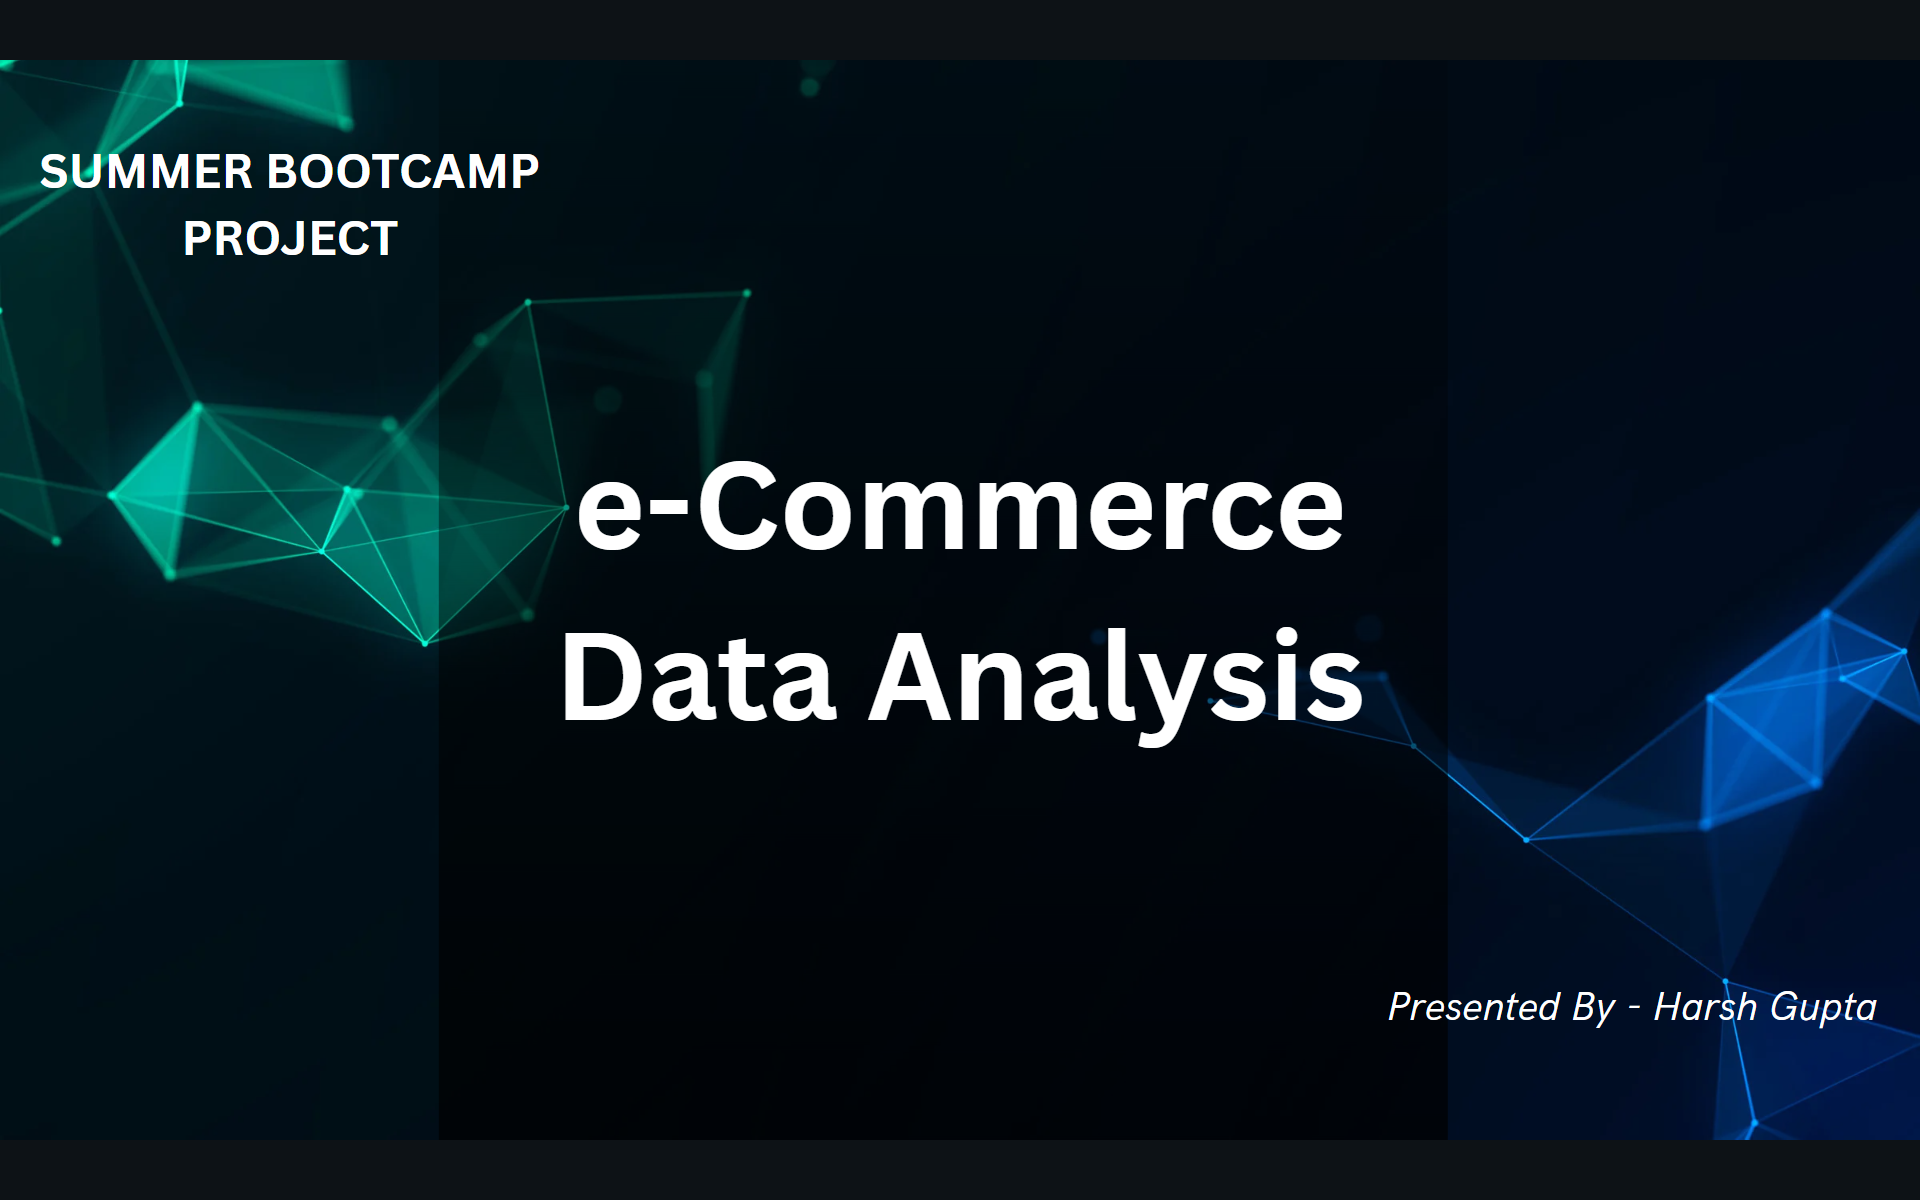

# Problem Statement

The goal of this project is to analyze a dataset from an international e-commerce company to identify patterns and causes behind late deliveries. The dataset includes shipment mode, customer service detalls, product importance, and delivery times. By investigating this data, we aim to reduce delivery delays and improve the supply chain process.


# Objective

- Clean and preprocess the dataset for analysis and visualization

- Create meaningful visualizations using Tableau

- Identify major reasons behind late deliveries

- Train classification models to predict delivery success

- Recommend operational changes based on findings


# Data Description

The dataset consists of 10,999 entries, each representing an order with attributes such as:

- ID: Order ID

- Gender: Customer gender

- Warehouse block: Warehouse segment

- Mode_of_Shipment: Shipment method (Right, Ship, Road)

- Product importance: Importance level of the product.

- Customer rating: Rating given by customer (1-5)

- Cost of the Product: Price of the product

- Discount offered: Discounts applied

- Weight in gms: Product weight

- Reached.on. Time Y.N. Target variable (0-On time, 1-Delayed)

- Additional engineered fields: Final price, Discount to Weight

#Data Exploration and Cleaning

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

- Task 1: Load the dataset into a pandas DataFrame and display the first few rows.

In [ ]:
df=pd.read_csv("/content/E_Commerce.csv")

  Observation:
This cell reads data from a CSV file into a pandas DataFrame.

In [ ]:
df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


 Observation:
Displays the first few rows of the DataFrame to understand its structure.

- Task 2: Summarize the dataset by providing basic statistics (mean, median, mode, standard
deviation, etc.).

In [ ]:
df.describe()

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,10999.00000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,5500.00000,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729,0.596691
std,3175.28214,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251,0.490584
min,1.00000,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,2750.50000,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000,0.000000
50%,5500.00000,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000,1.000000
75%,8249.50000,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000,1.000000
max,10999.00000,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000


 Observation:
Generates descriptive statistics of numeric columns.

- Task 3: Identify and handle missing values. Explain the chosen method for handling them.

In [ ]:
df.isnull().sum()

,0
ID,0
Warehouse_block,0
Mode_of_Shipment,0
Customer_care_calls,0
Customer_rating,0
Cost_of_the_Product,0
Prior_purchases,0
Product_importance,0
Gender,0
Discount_offered,0


 Observation:
Calculates the number of missing values in each column.

- Task 4: Identify and handle duplicate rows if any.

In [ ]:
print(f"Number of duplicate rows: {df.duplicated().sum()}")

Number of duplicate rows: 0


 Observation:
checked the number of duplicates

- Task 5: Convert categorical variables to numerical values using appropriate encoding
techniques (e.g., one-hot encoding, label encoding).

In [ ]:
categorical_columns = df.select_dtypes(include=['object']).columns
print("Categorical columns:", categorical_columns)
df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)
df_encoded.head()


Categorical columns: Index(['Warehouse_block', 'Mode_of_Shipment', 'Product_importance', 'Gender'], dtype='object')


,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,Warehouse_block_B,Warehouse_block_C,Warehouse_block_D,Warehouse_block_F,Mode_of_Shipment_Road,Mode_of_Shipment_Ship,Product_importance_low,Product_importance_medium,Gender_M
0,1,4,2,177,3,44,1233,1,False,False,True,False,False,False,True,False,False
1,2,4,5,216,2,59,3088,1,False,False,False,True,False,False,True,False,True
2,3,2,2,183,4,48,3374,1,False,False,False,False,False,False,True,False,True
3,4,3,3,176,4,10,1177,1,True,False,False,False,False,False,False,True,True
4,5,2,2,184,3,46,2484,1,False,True,False,False,False,False,False,True,False


- Observation:
Converted categorical variables to numerical values

#Data Visualization

- Task 6: Create visualizations to understand the distribution of numerical features (e.g.,
histograms, box plots).

In [ ]:
num_cols = ['Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product',
            'Prior_purchases', 'Discount_offered', 'Weight_in_gms']

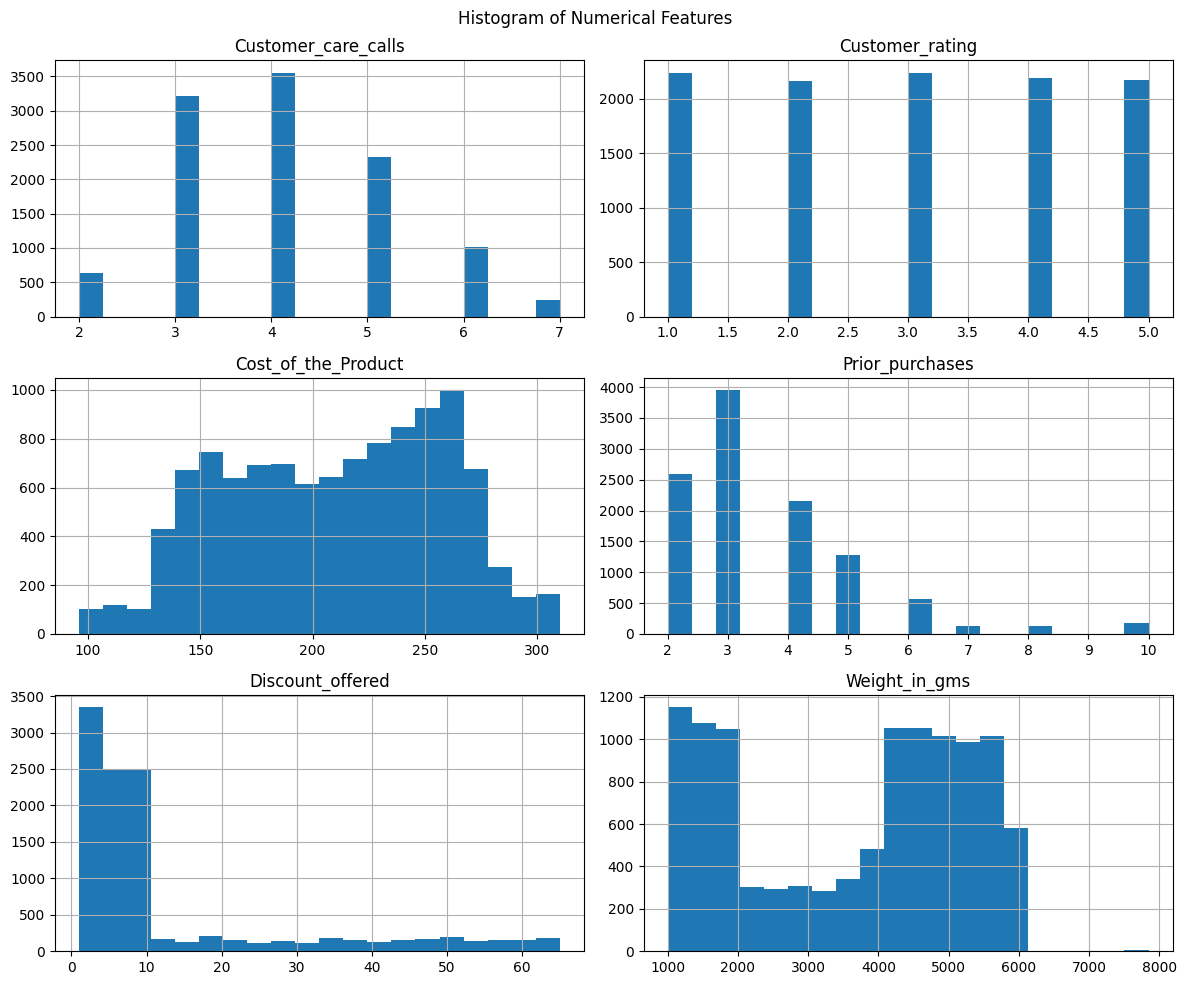

In [ ]:
df[num_cols].hist(figsize=(12, 10), bins=20)
plt.suptitle("Histogram of Numerical Features")
plt.tight_layout()
plt.show()

observation :  The visualizations reveal several distribution patterns in the dataset. The discount offered is highly right-skewed, with most orders receiving minimal discounts. Product weight shows a bimodal distribution. Most customers made 3 to 5 customer care calls, while very few made extremely low or high numbers of calls. The cost of the product is moderately right-skewed. Lastly, prior purchases are skewed to the left.

- Task 7: Create visualizations for categorical features (e.g., bar charts, pie charts).

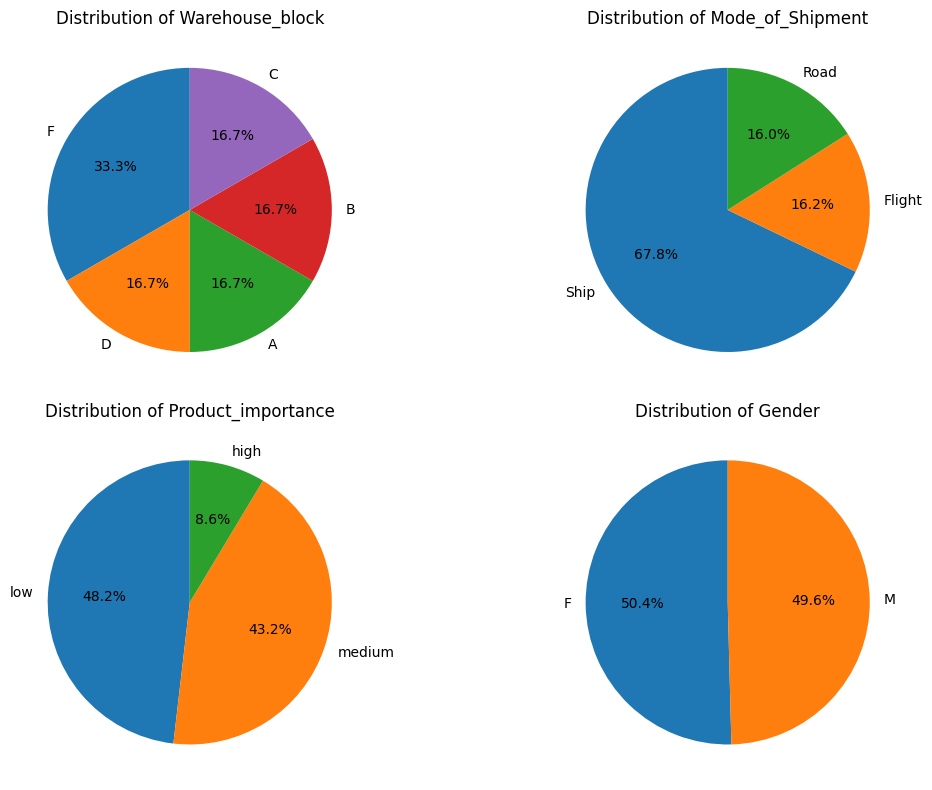

In [ ]:
cat_cols = ['Warehouse_block', 'Mode_of_Shipment', 'Product_importance', 'Gender']

plt.figure(figsize=(12, 8))
for i, col in enumerate(cat_cols):
    plt.subplot(2, 2, i + 1)
    df[col].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
    plt.title(f"Distribution of {col}")
    plt.ylabel('')
plt.tight_layout()
plt.show()

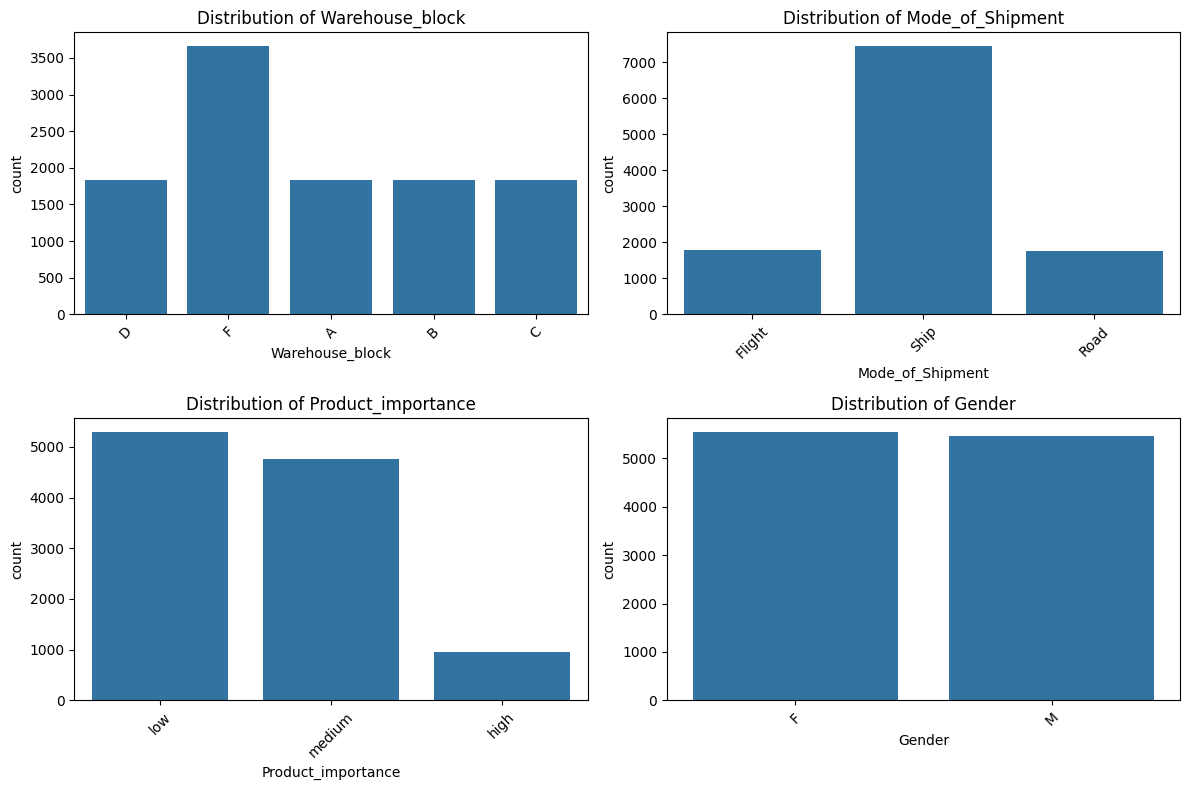

In [ ]:

cat_cols = ['Warehouse_block', 'Mode_of_Shipment', 'Product_importance', 'Gender']

plt.figure(figsize=(12, 8))
for i, col in enumerate(cat_cols):
    plt.subplot(2, 2, i + 1)
    sns.countplot(x=col, data=df)
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


- Task 8: Generate correlation heatmaps to identify relationships between numerical features.

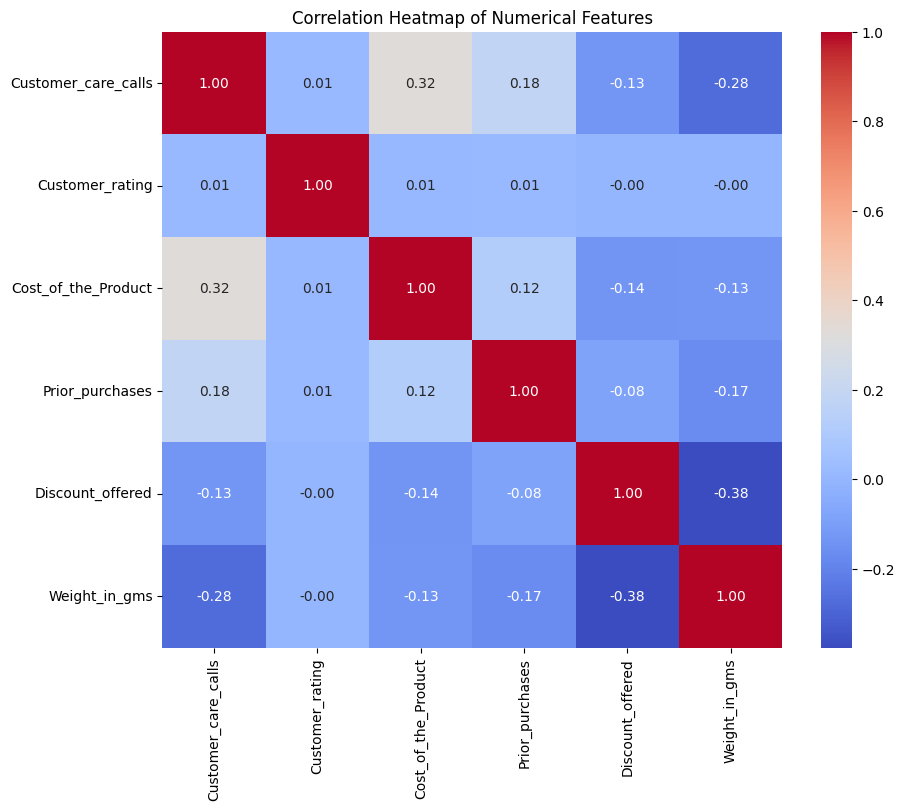

In [ ]:
correlation_matrix = df[num_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

 Observation:
The correlation heatmap reveals that most features are weakly correlated, indicating independence. Customer Care Calls moderately correlates with Product Cost (0.32) and negatively with Weight (-0.28), suggesting expensive, lighter items get more support queries. Discount Offered has the strongest negative correlation with Weight (-0.38), meaning heavier products receive fewer discounts. Customer Rating shows no significant correlation with any feature, implying ratings are unaffected by other numerical factors.

- Task 9 Pair chart

<Figure size 1500x1200 with 0 Axes>

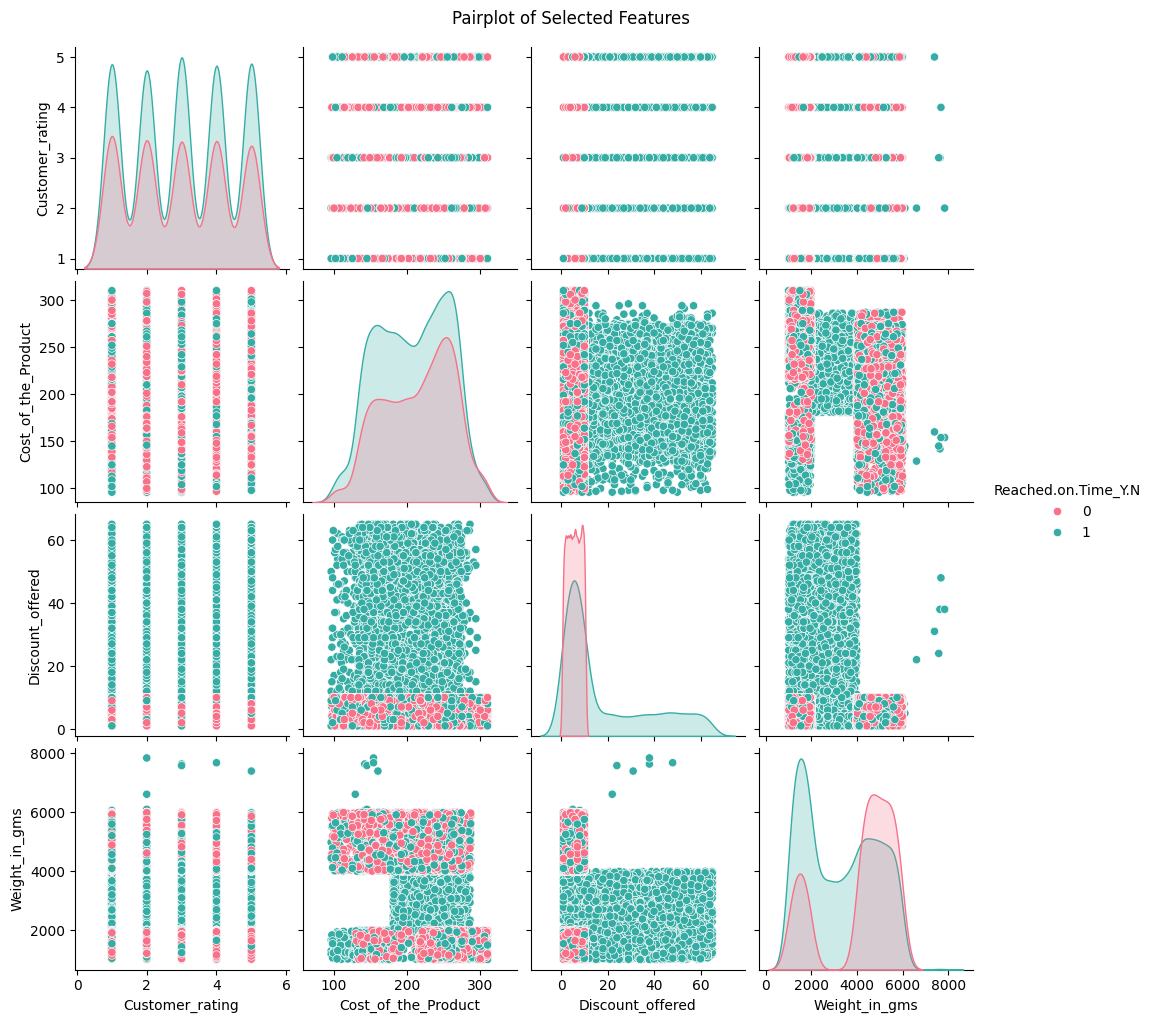

In [ ]:
subset = ['Customer_rating', 'Cost_of_the_Product', 'Discount_offered', 'Weight_in_gms']
plt.figure(figsize=(15, 12))
sns.pairplot(df, vars=subset, hue='Reached.on.Time_Y.N', palette='husl')
plt.suptitle("Pairplot of Selected Features", y=1.02)
plt.show()

In [ ]:
df.to_csv("cleaned_ecommerce_data.csv", index=False)

# Model Building

- Task 12: Split the dataset into training and testing sets.

In [ ]:
X = df_encoded.drop(columns=['ID','Prior_purchases', 'Customer_rating','Reached.on.Time_Y.N'])
y = df_encoded['Reached.on.Time_Y.N']
print(y.value_counts())
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Reached.on.Time_Y.N
1    6563
0    4436
Name: count, dtype: int64


Observation:
This code selects relevant features by dropping identifiers and the target column from the dataset, then defines 'Reached.on.Time_Y.N' as the target variable. It prints the class distribution to check for imbalance and splits the data into training and testing sets (80/20) using a fixed random state for reproducibility.

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

 Observation:
This code applies feature scaling using `StandardScaler` to normalize the training and testing data. It ensures that all features have a mean of 0 and standard deviation of 1


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

ann_model = Sequential()

# First hidden layer
ann_model.add(Dense(256, input_dim=X_train_scaled.shape[1], activation='relu'))
ann_model.add(Dropout(0.4))

# Second hidden layer
ann_model.add(Dense(128, activation='relu'))
ann_model.add(Dropout(0.3))

# Third hidden layer
ann_model.add(Dense(64, activation='relu'))
ann_model.add(Dropout(0.3))

# Fourth hidden layer
ann_model.add(Dense(32, activation='relu'))
ann_model.add(Dropout(0.2))

# Output layer
ann_model.add(Dense(1, activation='sigmoid'))

ann_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = ann_model.fit(
    X_train_scaled, y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    verbose=1
)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
220/220 ━━━━━━━━━━━━━━━━━━━━ 9s 21ms/step - accuracy: 0.5982 - loss: 0.6234 - val_accuracy: 0.6591 - val_loss: 0.5284
Epoch 2/100
220/220 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6320 - loss: 0.5406 - val_accuracy: 0.6653 - val_loss: 0.5207
Epoch 3/100
220/220 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6463 - loss: 0.5338 - val_accuracy: 0.6597 - val_loss: 0.5200
Epoch 4/100
220/220 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6494 - loss: 0.5296 - val_accuracy: 0.6676 - val_loss: 0.5184
Epoch 5/100
220/220 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6506 - loss: 0.5274 - val_accuracy: 0.6653 - val_loss: 0.5193
Epoch 6/100
220/220 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6566 - loss: 0.5282 - val_accuracy: 0.6670 - val_loss: 0.5179
Epoch 7/100
220/220 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6598 - loss: 0.5201 - val_accuracy: 0.6722 - val_loss: 0.5157
Epoch 8/100
220/220 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6607 - loss: 0.5228 - val_acc

 Observation: This code builds and trains an artificial neural network using TensorFlow's Keras API for binary classification. The model consists of four hidden layers with decreasing units (256 → 32) and ReLU activation, along with dropout layers to prevent overfitting

In [ ]:
loss, ann_accuracy = ann_model.evaluate(X_test_scaled, y_test)
print(f"\n✅ ANN Test Accuracy: {ann_accuracy:.4f}")


69/69 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.6769 - loss: 0.5213

✅ ANN Test Accuracy: 0.6836


- Task 14: Decision Tree

In [ ]:
dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(X_train, y_train)
y_pred_dt = dtree.predict(X_test)
print("\nDecision Tree:")
print(classification_report(y_test, y_pred_dt))


Decision Tree:
              precision    recall  f1-score   support

           0       0.56      0.54      0.55       895
           1       0.69      0.71      0.70      1305

    accuracy                           0.64      2200
   macro avg       0.63      0.63      0.63      2200
weighted avg       0.64      0.64      0.64      2200



Observation: This code trains a Decision Tree Classifier using the training data and evaluates it on the test set. It uses a fixed random state for reproducibility. After making predictions, it prints a classification report, providing metrics like precision, recall, f1-score, and accuracy to assess the model's performance.

- Task 15: Random Forest

In [ ]:
model = RandomForestClassifier(
    n_estimators=100,
    class_weight='balanced',
    random_state=42
)
model.fit(X_train, y_train)
y_pred_rf = model.predict(X_test)
print("\nRandom Forest:")
print(classification_report(y_test, y_pred_rf))


Random Forest:
              precision    recall  f1-score   support

           0       0.58      0.66      0.62       895
           1       0.74      0.67      0.71      1305

    accuracy                           0.67      2200
   macro avg       0.66      0.67      0.66      2200
weighted avg       0.68      0.67      0.67      2200



 Observation: This code trains a Random Forest Classifier with 100 trees and balanced class weights to handle any class imbalance. It fits the model on the training data and predicts on the test set. The classification report displays performance metrics such as precision, recall, and f1-score to evaluate the model's effectiveness.

- Task 16: Model Comparison

In [ ]:
print(f"Decision Tree Accuracy: {accuracy_score(y_test, y_pred_dt):.4f}")
print(f"Random Forest Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")

Decision Tree Accuracy: 0.6427
Random Forest Accuracy: 0.6673


 Observation: This code prints the accuracy scores of both the Decision Tree and Random Forest models on the test data. It provides a direct comparison of their predictive performance, helping identify which model performs better overall.

# Model Tuning

In [ ]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [ ]:
from sklearn.model_selection import GridSearchCV

rf_model = RandomForestClassifier(random_state=42, class_weight='balanced')

grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='accuracy')

In [ ]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              random_state=42),
             param_grid={'max_depth': [10, 20, 30, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

In [ ]:
best_rf_model = grid_search.best_estimator_
y_pred_tuned_rf = best_rf_model.predict(X_test)

print("\nTuned Random Forest:")
print(classification_report(y_test, y_pred_tuned_rf))
print(f"Tuned Random Forest Accuracy: {accuracy_score(y_test, y_pred_tuned_rf):.4f}")

print("\nModel Comparison:")
print(f"ANN Accuracy: {ann_accuracy:.4f}")
print(f"Decision Tree Accuracy: {accuracy_score(y_test, y_pred_dt):.4f}")
print(f"Random Forest Accuracy (untuned): {accuracy_score(y_test, y_pred_rf):.4f}")
print(f"Random Forest Accuracy (tuned): {accuracy_score(y_test, y_pred_tuned_rf):.4f}")


Tuned Random Forest:
              precision    recall  f1-score   support

           0       0.57      0.96      0.71       895
           1       0.95      0.50      0.66      1305

    accuracy                           0.69      2200
   macro avg       0.76      0.73      0.69      2200
weighted avg       0.79      0.69      0.68      2200

Tuned Random Forest Accuracy: 0.6882

Model Comparison:
ANN Accuracy: 0.6836
Decision Tree Accuracy: 0.6427
Random Forest Accuracy (untuned): 0.6673
Random Forest Accuracy (tuned): 0.6882


# Data Visualization with Tableau

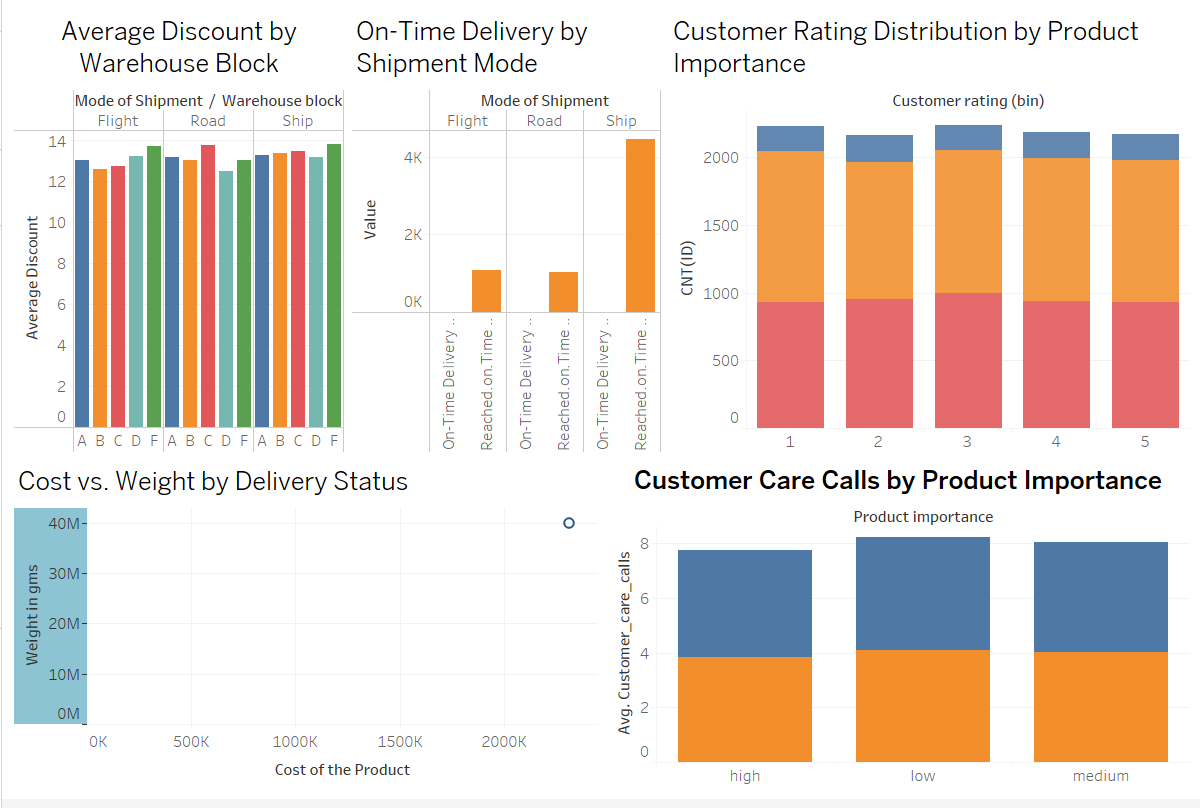